In [3]:
# 1.Linear regression
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [4]:
# import data
data=pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\Advertising.csv',index_col=0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


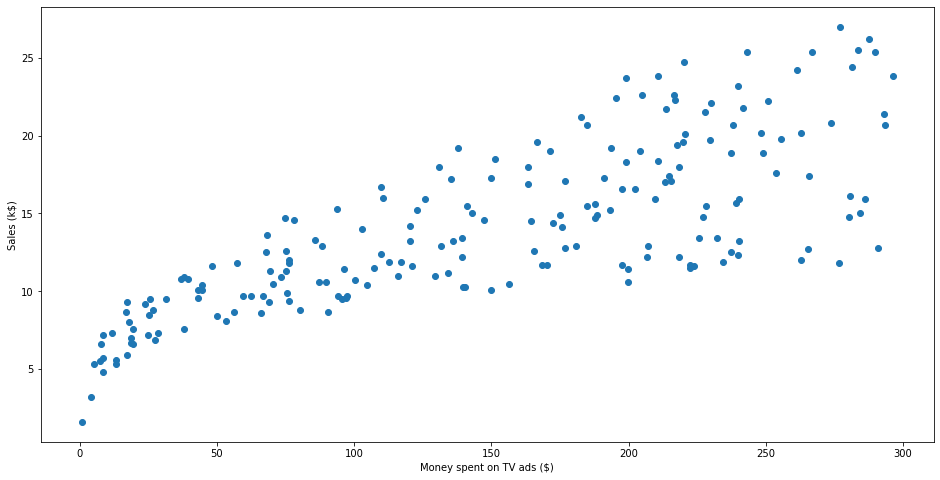

In [6]:
# find the effect of TV on sales (simple linear regression)
# overall look
plt.figure(figsize=(16,8))
plt.scatter(data['TV'],data['sales'])
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()


In [7]:
# reshape data
X=data['TV'].values.reshape(-1,1)
y=data['sales'].values.reshape(-1,1)

In [8]:
# call the regression
reg=LinearRegression()
reg.fit(X,y)

print(f"The linear model is: \n Y={reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: 
 Y=7.032593549127693 + 0.047536640433019764*TV


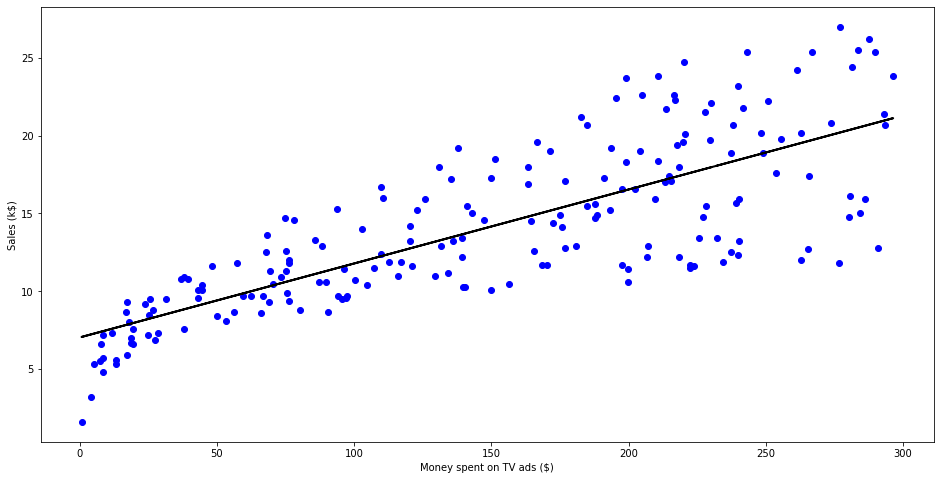

In [9]:
#make prediection:
predictions=reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X,y,c='blue')
plt.plot(X,predictions,c='black',linewidth=2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [10]:
# assess the model
X=data['TV']
y=data['sales']

exog=sm.add_constant(X)
est=sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        21:21:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
#2. Multiple linear regression
Xs=data.drop(['sales'],axis=1)
y=data['sales'].values.reshape(-1,1)

reg=LinearRegression()
reg.fit(Xs,y)

print(f"The linear model is: \n Y={reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is: 
 Y=2.9388893694594067 + 0.045764645455397615*TV + 0.18853001691820445*radio + -0.0010374930424762174*newspaper


In [18]:
# assess the model
X=np.column_stack((data['TV'],data['radio'],data['newspaper']))
y=data['sales'].values.reshape(-1,1)

exog=sm.add_constant(X)
est=sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        21:48:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
## Conclusion:
# model explain almost 90% of the variability of the sales
# p value of newspaper=0.86 > 0.05 => newspaper is actually relevant in our model => we could take it out

In [8]:
X=data['TV']
y=data['sales'].values.reshape(-1,1)
print(X)

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64
